In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
x = df.drop('Outcome',axis=1)  # x is independent feature
y = df['Outcome']              # y is dependent feature
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(768, 8)
(768,)


In [11]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
print(x.shape)
print(y.shape)
print(768*0.25)
print(768-192)

(768, 8)
(768,)
192.0
576


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [14]:
import tensorflow as tf

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
m1 = Sequential()
m1.add(Dense(40,activation='relu',input_dim=8))    # input layers has 8 neurons, H1 has 40 neurons
m1.add(Dense(20,activation='relu'))                # H2 has 20 neurons
m1.add(Dense(8,activation='relu'))                 # H3 has 8 neurons
m1.add(Dense(1,activation='sigmoid'))              # Output Layer has 1 neuron

m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
h1 = m1.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
18/18 [==============================] - 1s 18ms/step - loss: 9.6942 - accuracy: 0.3628 - val_loss: 1.6365 - val_accuracy: 0.5885
Epoch 2/30
18/18 [==============================] - 0s 6ms/step - loss: 1.4345 - accuracy: 0.6267 - val_loss: 1.2136 - val_accuracy: 0.6302
Epoch 3/30
18/18 [==============================] - 0s 5ms/step - loss: 0.9744 - accuracy: 0.6094 - val_loss: 0.9183 - val_accuracy: 0.6406
Epoch 4/30
18/18 [==============================] - 0s 6ms/step - loss: 0.7996 - accuracy: 0.6684 - val_loss: 0.7694 - val_accuracy: 0.6094
Epoch 5/30
18/18 [==============================] - 0s 5ms/step - loss: 0.7096 - accuracy: 0.6580 - val_loss: 0.7099 - val_accuracy: 0.6458
Epoch 6/30
18/18 [==============================] - 0s 5ms/step - loss: 0.6630 - accuracy: 0.6736 - val_loss: 0.6609 - val_accuracy: 0.6510
Epoch 7/30
18/18 [==============================] - 0s 5ms/step - loss: 0.6259 - accuracy: 0.6910 - val_loss: 0.6286 - val_accuracy: 0.6823
Epoch 8/30
18/18 [=

In [46]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
25,0.549796,0.720486,0.596671,0.713542,25
26,0.544347,0.743056,0.594135,0.687500,26
27,0.530401,0.739583,0.597539,0.713542,27
28,0.534617,0.734375,0.598576,0.697917,28
29,0.535754,0.739583,0.601631,0.692708,29


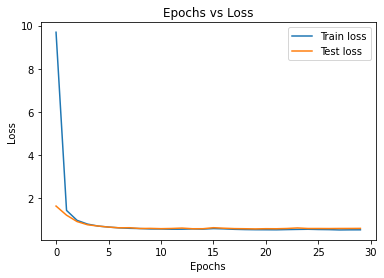

In [47]:
plt.plot(r1['Epochs'],r1['loss'],label='Train loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

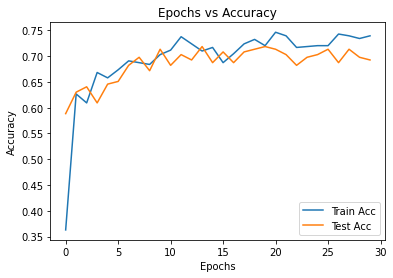

In [48]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Train Acc')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Test Acc')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
ypred = m1.predict(x_test)
print(len(ypred))
print(ypred[:10])

6/6 [==============================] - 0s 2ms/step
192
[[0.6257875 ]
 [0.1040579 ]
 [0.2662275 ]
 [0.28392676]
 [0.3715257 ]
 [0.5947929 ]
 [0.28125072]
 [0.12547794]
 [0.57467854]
 [0.37000453]]


In [50]:
ypred_m1 = [1 if i>0.5 else 0 for i in ypred]
print(ypred_m1)

[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [51]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[109  14]
 [ 45  24]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       123
           1       0.63      0.35      0.45        69

    accuracy                           0.69       192
   macro avg       0.67      0.62      0.62       192
weighted avg       0.68      0.69      0.67       192



In [53]:
print(cm)

[[109  14]
 [ 45  24]]


In [54]:
acc = (24+109)/(109+14+45+24)
print(acc)

0.6927083333333334


In [55]:
pre0 = 109/(109+45)
pre1 = 24/(24+14)
print('Pre0',pre0,'Pre1',pre1)
rec0 = 109/(109+14)
rec1 = 24/(24+45)
print('Rec0',rec0,'Rec1',rec1)

Pre0 0.7077922077922078 Pre1 0.631578947368421
Rec0 0.8861788617886179 Rec1 0.34782608695652173


In [56]:
f1s0 = 2*pre0*rec0/(pre0+rec0)
f1s1 = 2*pre1*rec1/(pre1+rec1)
print('F1Scr0',f1s0)
print('F1Scr1',f1s1)

F1Scr0 0.7870036101083031
F1Scr1 0.4485981308411215
